In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def take_and_clean(filename, keyword, print_info=False):
    raw = pd.read_json(f'./data/colossusClash/{filename}.json')
    ranks = raw[['creatorName', 'totalScore']]
    ranks = ranks[ranks['creatorName'].str.contains(keyword)]
    ranks = ranks[ranks['creatorName'].str.contains('C-')]
    if print_info:
        ranks.info()
    return ranks

In [8]:
UNITS = ['MUN', 'THR', 'OGR', 'SHM', 'BRW', 'WRL']
COLOSSUSES = ['CRO', 'TAL', 'HYP', 'ATL']
TACTICS = ['SIMPL', 'SPEC']

def collect_scores(ranks, main_names, addends=None):
    results = []
    column_names = []
    for name in main_names:
        if addends:
            for add in addends:
                lines = ranks[ranks['creatorName'].str.contains(name) & ranks['creatorName'].str.contains(add)]['totalScore'] * 100
                lines.reset_index(drop=True, inplace=True)
                results.append(lines)
                column_names.append(f'{name}-{add}')
        else:
            lines = ranks[ranks['creatorName'].str.contains(name)]['totalScore'] * 100
            lines.reset_index(drop=True, inplace=True)
            results.append(lines)
            column_names.append(name)

    unit_scores = pd.concat(results, ignore_index=True, axis=1)
    unit_scores.columns = column_names
    return unit_scores


def print_score_data(unit_scores):
    result = []
    for name in unit_scores.columns:
        units = unit_scores[name]
        result.append([name, units.mean(), units.median()])

    result.sort(key=lambda x: x[1], reverse=True)
    print('NAME -- MEAN   --   MED')
    for line in result:
        print(f'{line[0]} -- {line[1]: <7.2f} -- {line[2]:.2f}')

def boxplot_score(scores, vert_size=6):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(16, vert_size))
    sns.boxplot(data=scores)

NAME -- MEAN   --   MED
CRO-SIMPL -- 3183.14 -- 3322.99
CRO-SPEC -- 2862.74 -- 2922.21
TAL-SPEC -- 2097.94 -- 2283.27
HYP-SPEC -- 2016.69 -- 2350.27
HYP-SIMPL -- 1966.63 -- 2482.63
TAL-SIMPL -- 1893.86 -- 2198.22
ATL-SPEC -- 1262.04 -- 1409.34
ATL-SIMPL -- 959.18  -- 1156.52


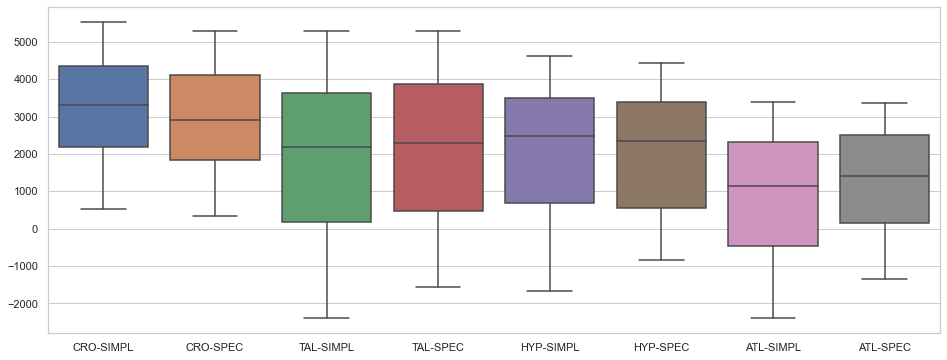

In [11]:
ranks = take_and_clean('rankings1101A', '1101A')
colossus_tactic = collect_scores(ranks, COLOSSUSES, TACTICS)
print_score_data(colossus_tactic)
boxplot_score(colossus_tactic)